## Load the data

In [ ]:
import pandas as pd
data = pd.read_csv('Data\processed_data.csv')
print(data.shape)
data.head()

(458196, 4)


,id,text,dialect,processed_text
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,13,لكن بالنهايه ينتفض يغير
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,13,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون م...
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,13,مبين من كلامه خليجي
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,13,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,13,وين هل الغيبه اخ محمد


## Split data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

X = data['processed_text']
y = data['dialect']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Methods we will use

### report method to see our model

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report

def report(model, X_train, y_train, X_test, y_test):
  train_acc = model.score(X_train, y_train)   # to see train accuracy
  test_acc = model.score(X_test, y_test)    # to see test accuracy
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  predictions=model.predict(X_test)    # this is predictions
  cr = classification_report(predictions,y_test)  # to see precision and recall and f1_score for each label 
  print(cr)
 
  fig, ax = plt.subplots(figsize=(12, 12))  
  plot_confusion_matrix(model, X_test, y_test, ax=ax)  # to plot predictions
  plt.show()


### text_fit_predict_without_imbalanced method to fit our model with orignal processed data

In [ ]:
# this method to fit our orignal data
def text_fit_predict_without_imbalanced(X_train, X_test, y_train, y_test, model_model):

  model = model_model.fit(X_train, y_train)  # fit our model
  train_acc = model.score(X_train, y_train)   # to see train accuracy
  test_acc = model.score(X_test, y_test)    # to see test accuracy
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model


### text_fit_predict_with_imbalanced method to fit model with resample processed data

In [ ]:
# this method to resample our data and fit it because our data is imbalanced
def text_fit_predict_with_imbalanced(X_train, X_test, y_train, y_test, model_model, re_sample):
  
  print('features: {}'.format(X_train.shape[1]))

  os =  re_sample  # type of resample (RandomOverSampler or SMOTE)
  X_res, y_res = os.fit_resample(X_train, y_train)  # fit resample data
  print(f'resample: {X_res.shape, y_res.shape}')

  model=model_model.fit(X_res, y_res)  # fit our model
  train_acc = model.score(X_train, y_train)   # to see train accuracy
  test_acc = model.score(X_test, y_test)    # to see test accuracy
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model


## Build classification models

### Build models with CountVectorizer 

#### with orignal processed data

In [ ]:
pip install Arabic-Stopwords

     |████████████████████████████████| 353 kB 5.5 MB/s 
     |████████████████████████████████| 126 kB 40.9 MB/s 


In [ ]:
import arabicstopwords.arabicstopwords as stp   # to remove arabic stop words
from sklearn.linear_model import LogisticRegression  # our model used solver 'sag' because our data is large
from sklearn.feature_extraction.text import CountVectorizer # type of feature_extraction

cntVec = CountVectorizer(stop_words = stp.STOPWORDS)
X_train_c = cntVec.fit_transform(X_train)  # fit X_train only
X_test_c = cntVec.transform(X_test)  # transform X_test
model1 = text_fit_predict_without_imbalanced(X_train_c, X_test_c, y_train, y_test, LogisticRegression(solver='sag'))

Train acc: 0.6339324946820429
Test acc: 0.5018638311988756


#### with resample data with RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler # to resample data
model2 = text_fit_predict_with_imbalanced(X_train_c, X_test_c, y_train, y_test, LogisticRegression(solver='sag'), RandomOverSampler())

features: 361792
resample: ((780624, 361792), (780624,))
Train acc: 0.6955334980372301
Test acc: 0.49020070013705924


#### with resample data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE # to resample data
model3 = text_fit_predict_with_imbalanced(X_train_c, X_test_c, y_train, y_test, LogisticRegression(solver='sag'), SMOTE(sampling_strategy='minority'))

features: 361792
resample: ((380044, 361792), (380044,))
Train acc: 0.5903499812307397
Test acc: 0.4688648525958323


### Build models with TfidfVectorizer

#### with orignal processed data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # feature_extraction

tfidf = TfidfVectorizer(stop_words = stp.STOPWORDS)  # stp.STOPWORDS ==> arabic stop words
X_train_tfidf = tfidf.fit_transform(X_train)  # fit X_train only
X_test_tfidf = tfidf.transform(X_test) # transform X_test
model4 = text_fit_predict_without_imbalanced(X_train_tfidf, X_test_tfidf, y_train, y_test, LogisticRegression(solver='sag'))

Train acc: 0.7040043998638137
Test acc: 0.5175514408681001


### With resample data with RandomOverSampler

In [ ]:
model5 = text_fit_predict_with_imbalanced(X_train_tfidf, X_test_tfidf, y_train, y_test, LogisticRegression(solver='sag'), RandomOverSampler())

features: 361792
resample: ((780624, 361792), (780624,))
Train acc: 0.7777574080378994
Test acc: 0.5088826615684118


### With resample data with SMOTE

In [ ]:
model6 = text_fit_predict_with_imbalanced(X_train_tfidf, X_test_tfidf, y_train, y_test, LogisticRegression(solver='sag'),  SMOTE(sampling_strategy='minority'))

features: 361792
resample: ((380044, 361792), (380044,))
Train acc: 0.7005851935270787
Test acc: 0.5111873521375132


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

grid={'C':10.0 **np.arange(-2,3),'max_iter':[150,200,500]}

os =  RandomOverSampler() 
X_res, y_res = os.fit_resample(X_train_tfidf, y_train)  # fit resample data

log_model = LogisticRegression(solver='sag')
clf=GridSearchCV(estimator = log_model, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_res, y_res )

Train acc: 0.9699852108877844
Test acc: 0.4254449457143844
              precision    recall  f1-score   support

           0       0.69      0.72      0.71     13725
           1       0.43      0.43      0.43     10670
           2       0.43      0.47      0.45      9782
           3       0.59      0.62      0.61      8727
           4       0.40      0.40      0.40      7662
           5       0.32      0.31      0.32      7175
           6       0.55      0.57      0.56      6659
           7       0.34      0.33      0.33      6919
           8       0.35      0.33      0.34      7074
           9       0.31      0.29      0.30      7031
          10       0.30      0.27      0.28      5405
          11       0.32      0.30      0.31      4256
          12       0.47      0.46      0.46      4147
          13       0.47      0.46      0.47      3830
          14       0.52      0.53      0.52      3509
          15       0.55      0.57      0.56      2746
          16       0.2

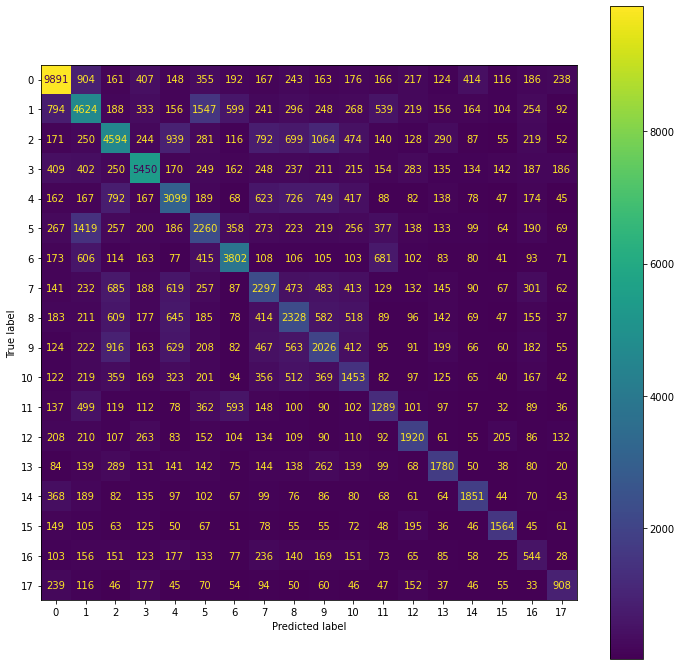

In [ ]:
report(clf, X_train_tfidf, y_train, X_test_tfidf, y_test)  # call report method

## Build Deep learning model

### convert labels

In [ ]:
dict = {
    0:'EG', 1:'PL', 2:'KW', 3:'LY', 4:'QA', 5:'JO', 6:'LB', 7:'SA', 8:'AE', 9:'BH',
    10:'OM', 11:'SY', 12:'DZ', 13:'IQ', 14:'SD', 15:'MA', 16:'YE', 17:'TN'
}

data['dialect'] = data['dialect'].map(dict)

### Build tokenizer

In [ ]:
from keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each text. (make it 150)
MAX_SEQUENCE_LENGTH = 150

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(data['processed_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 429893 unique tokens.


In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(data['processed_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (458196, 150)


In [ ]:
Y = pd.get_dummies(data['dialect']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (458196, 18)


### Split data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(366556, 150) (366556, 18)
(91640, 150) (91640, 18)


### Build & Train deep learning model with four layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 18)                1818      
                                                                 
Total params: 5,082,218
Trainable params: 5,082,218
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='categorical_crossentropy', patience=3, min_delta=0.0001)])

Epoch 1/5
5155/5155 [==============================] - 2524s 489ms/step - loss: 1.8537 - accuracy: 0.4144 - val_loss: 1.5921 - val_accuracy: 0.4992
Epoch 2/5
5155/5155 [==============================] - 2502s 485ms/step - loss: 1.4038 - accuracy: 0.5599 - val_loss: 1.5329 - val_accuracy: 0.5234
Epoch 3/5
5155/5155 [==============================] - 2494s 484ms/step - loss: 1.2122 - accuracy: 0.6195 - val_loss: 1.5701 - val_accuracy: 0.5227
Epoch 4/5
5155/5155 [==============================] - 2523s 489ms/step - loss: 1.0755 - accuracy: 0.6612 - val_loss: 1.6475 - val_accuracy: 0.5165
Epoch 5/5
5155/5155 [==============================] - 2549s 494ms/step - loss: 0.9756 - accuracy: 0.6920 - val_loss: 1.7396 - val_accuracy: 0.5129


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2864/2864 [==============================] - 130s 45ms/step - loss: 1.7303 - accuracy: 0.5107
Test set
  Loss: 1.730
  Accuracy: 0.511


## Save models using pickle

In [ ]:
# best model is model4
import pickle
filename = 'DL_model.pkl'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://6aa843ad-90de-43d3-8acd-cb3613b72b83/assets


In [ ]:
filename = 'log_model.pkl'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
filename = 'tfidf.pkl'
pickle.dump(tfidf, open(filename, 'wb'))

In [ ]:
filename = 'tokenizer.pkl'
pickle.dump(tokenizer, open(filename, 'wb'))